<div class="frontmatter text-center">
<h1>Geospatial Data Science</h1>
<h2>Exercise 3: Choropleth Maps</h2>
<h3>IT University of Copenhagen, Spring 2024</h3>
<h3>Instructor: Ditte Stavski</h3>
</div>

This notebook was adapted from:
* A course on geographic data science: https://darribas.org/gds_course/content/bD/diy_D.html

## Data

For the exercise we will use 2 data sets:
- data with the name and spatial extent of all Danish municipalities
- data with the number of covid cases per 100.000 residents in all Danish municipalities

The idea is to create choropleth maps of the COVID19-rate in the different municipalities using PySal's `mapclassify`. Before we can do that, the COVID-data must be [joined](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.join.html) to the data with the geometries.
To do that you can use a column `municipal_id` that exist in both data sets.

## Tasks

1. Choropleth Maps
2. Compare Classification Schemes
3. Zoom Maps

<div class="alert alert-block alert-info">
There are at two strong outliers in the data. Try to remove them and see how that changes the classification results.
</div>

In [63]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from pysal.viz import mapclassify as mc
import seaborn as sns
import numpy as np
import contextily as cx

from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import Normalize
from matplotlib import cm

### Task 1: COVID-19 choropleths

1. Create 3-4 different choropleths using classification methods your own choice based on the number of covid cases per 100,000 people (column **Cumulative_incidens_per_100000**), and complement them with a figure that displays the distribution of values using a KDE.

2. Create a choropleth map with qualitative values based on the following method:
- Split the municipalities in two classes: above and below the median COVID-19 rate
- Assign a qualitative label (`above` or `below`) to each municipality
- Create a unique value map for the labels you have just created

In [17]:
df = pd.read_csv("data2023/covid_cases.csv")
geo = gpd.read_file("data2023/municipalities_dk.gpkg")

gdf = geo.merge(df, on="municipal_id").drop_duplicates(subset=['municipal_id','navn'])
gdf = gdf.drop(gdf[gdf["Cumulative_incidens_per_100000"] > 500].index)



In [125]:
cov_median = np.median(gdf["Cumulative_incidens_per_100000"])
gdf["above_or_below_covid19_mean"] = None


for n, i in enumerate(gdf["Cumulative_incidens_per_100000"]):
    if i > cov_median:
        gdf["above_or_below_covid19_mean"].iloc[n] = "above"
    else: 
        gdf["above_or_below_covid19_mean"].iloc[n] = "below"

/tmp/ipykernel_644/3369659093.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf["above_or_below_covid19_mean"].iloc[n] = "above"
/tmp/ipykernel_644/3369659093.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf["above_or_below_covid19_mean"].iloc[n] = "below"


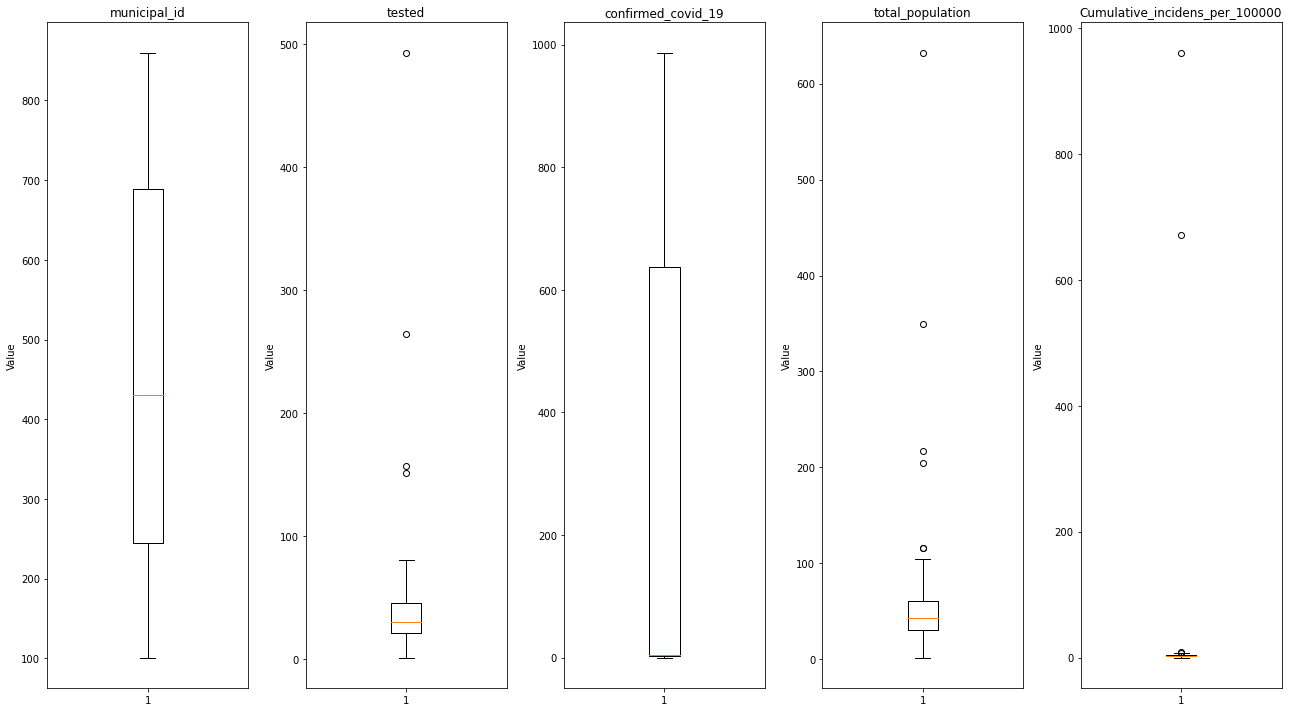

In [ ]:
# Create a box plot to visualize outliers
data_box = df

numeric_data = data_box.select_dtypes(include=['number'])

# Figure size
plt.figure(figsize=(18, 10))

# Box plot based on the numeric variables
for i, column in enumerate(numeric_data.columns):
    plt.subplot(1, len(numeric_data.columns), i + 1)
    plt.boxplot(numeric_data[column])
    plt.title(column)
    plt.ylabel('Value')

# Layout
plt.tight_layout()

# Show the box plots
plt.show()

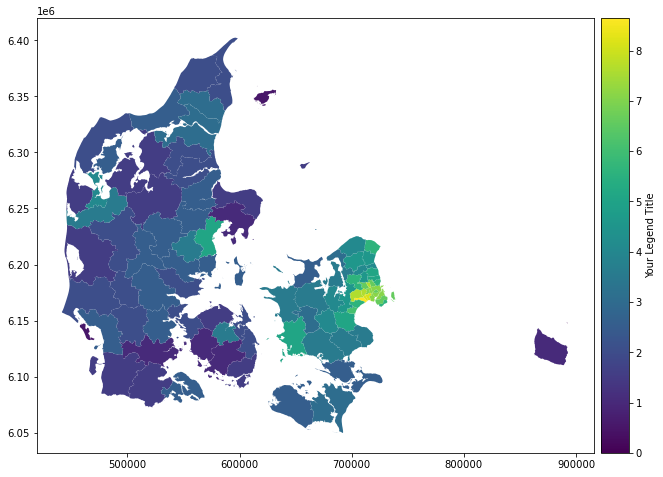

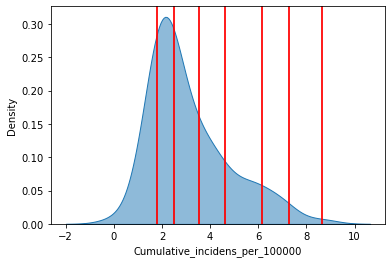

In [131]:
column_to_map = "Cumulative_incidens_per_100000"
scheme3 = "NaturalBreaks"

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
gdf.plot(column=column_to_map, 
         ax=ax, 
         scheme = "NaturalBreaks", 
         legend=False, 
         k=18, 
         cmap = "viridis",
         legend_kwds={"fmt": "{:.0f}"})

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
norm = Normalize(vmin=gdf[column_to_map].min(), vmax=gdf[column_to_map].max())
cbar = plt.colorbar(cm.ScalarMappable(norm=norm, cmap='viridis'), cax=cax)
cbar.set_label("Your Legend Title")

plt.show()


natural = mc.NaturalBreaks(gdf["Cumulative_incidens_per_100000"], k=7)
f, ax = plt.subplots(1)#*

#sns.rugplot(gdf["Cumulative_incidens_per_100000"])
sns.kdeplot(gdf["Cumulative_incidens_per_100000"], fill=True, alpha=0.5)

for cut in natural.bins:
    plt.axvline(cut, color='red', linewidth=1.75)
    
plt.show()

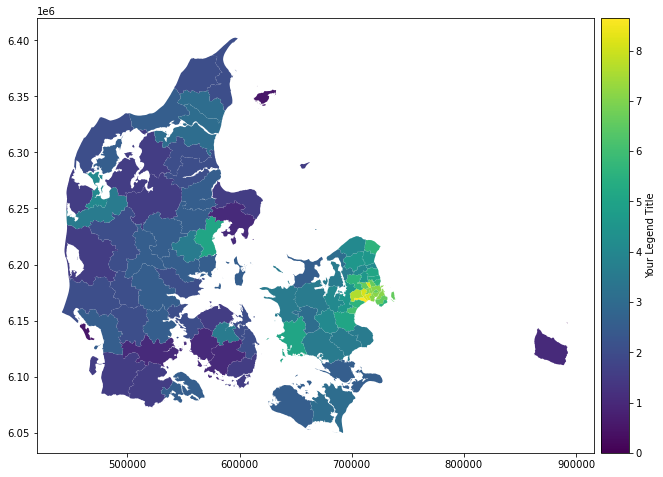

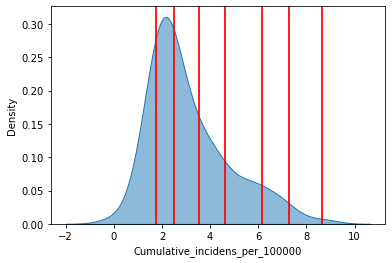

In [130]:
column_to_map = "Cumulative_incidens_per_100000"
scheme2 = "fisher_jenks"

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
gdf.plot(column=column_to_map, 
         ax=ax, 
         scheme = "fisher_jenks", 
         legend=False, 
         k=18, 
         cmap = "viridis",
         legend_kwds={"fmt": "{:.0f}"})

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
norm = Normalize(vmin=gdf[column_to_map].min(), vmax=gdf[column_to_map].max())
cbar = plt.colorbar(cm.ScalarMappable(norm=norm, cmap='viridis'), cax=cax)
cbar.set_label("Your Legend Title")

plt.show()


natural = mc.NaturalBreaks(gdf["Cumulative_incidens_per_100000"], k=7)
f, ax = plt.subplots(1)

#sns.rugplot(gdf["Cumulative_incidens_per_100000"])
sns.kdeplot(gdf["Cumulative_incidens_per_100000"], fill=True, alpha=0.5)

for cut in natural.bins:
    plt.axvline(cut, color='red', linewidth=1.75)
    
plt.show()

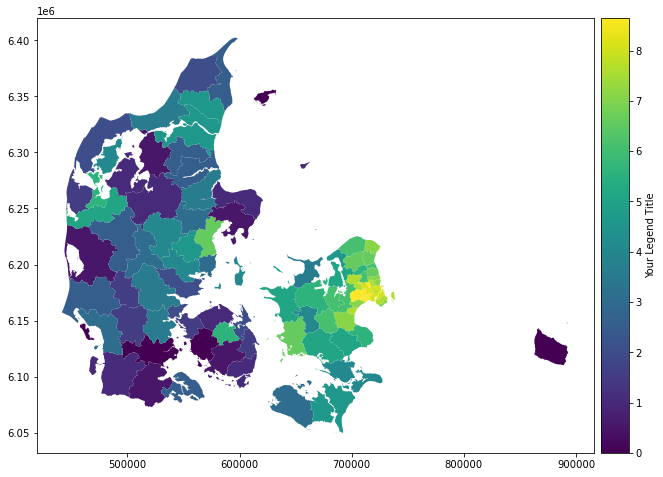

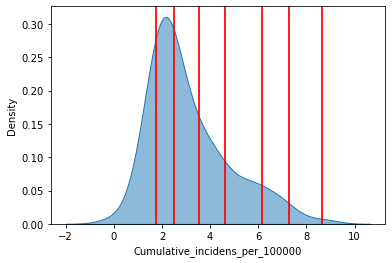

In [133]:
column_to_map = "Cumulative_incidens_per_100000"
scheme1 = "quantiles"
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
gdf.plot(column=column_to_map, 
         ax=ax, 
         scheme = scheme1, 
         legend=False, 
         k=18, 
         cmap = "viridis",
         legend_kwds={"fmt": "{:.0f}"})

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
norm = Normalize(vmin=gdf[column_to_map].min(), vmax=gdf[column_to_map].max())
cbar = plt.colorbar(cm.ScalarMappable(norm=norm, cmap='viridis'), cax=cax)
cbar.set_label("Your Legend Title")

plt.show()


natural = mc.NaturalBreaks(gdf["Cumulative_incidens_per_100000"], k=7)
f, ax = plt.subplots(1)

#sns.rugplot(gdf["Cumulative_incidens_per_100000"])
sns.kdeplot(gdf["Cumulative_incidens_per_100000"], fill=True, alpha=0.5)

for cut in natural.bins:
    plt.axvline(cut, color='red', linewidth=1.75)
    
plt.show()

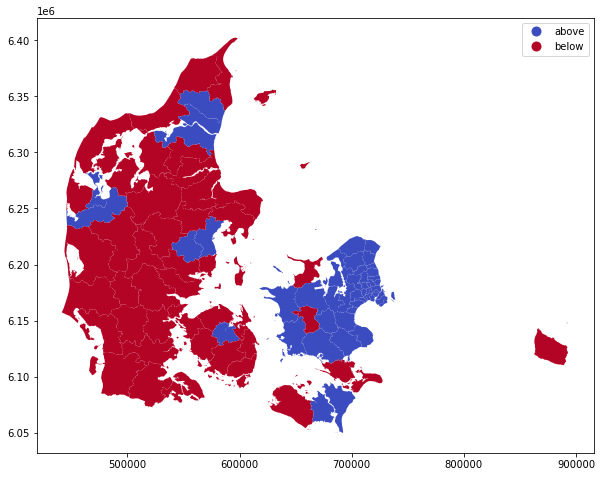

In [134]:
column_to_map = "above_or_below_covid19_mean"

fig, ax = plt.subplots(1, 1, figsize=(12, 8))

gdf.plot(column=column_to_map, 
         ax=ax, 
         legend=True, 
         cmap='coolwarm')

plt.show()

### Task 2: Compare Classification Schemes

Evaluate the classification schemes (not including the last, manual one) using the approach presented [here](https://geographicdata.science/book/notebooks/05_choropleth.html#comparing-classification-schemes).

**Which one would you use? Why?**

In [141]:
scheme1 = mapclassify.Quantiles(gdf["Cumulative_incidens_per_100000"],k=5)
scheme2 = mapclassify.FisherJenks(gdf["Cumulative_incidens_per_100000"],k=5)
scheme3 = mapclassify.NaturalBreaks(gdf["Cumulative_incidens_per_100000"],k=5)

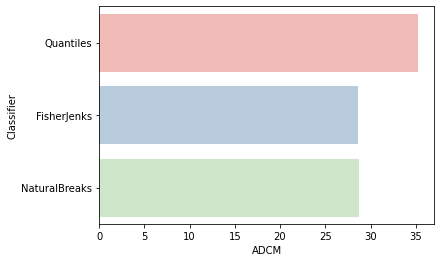

In [142]:
# Bunch classifier objects
class5 = scheme1, scheme2, scheme3
# Collect ADCM for each classifier
fits = np.array([c.adcm for c in class5])
# Convert ADCM scores to a DataFrame
adcms = pd.DataFrame(fits)
# Add classifier names
adcms["classifier"] = [c.name for c in class5]
# Add column names to the ADCM
adcms.columns = ["ADCM", "Classifier"]
ax = sns.barplot(
    y="Classifier", x="ADCM", data=adcms, palette="Pastel1"
)

### Task 3: Zoom Maps

Generate the following maps:

- Zoom on **an area of your choice**.
- Chloropleth map of your choice with COVID-19 rate for all of **the selected area**, but using a **classification based on all of DK**.
- Same as above, **but this time with a classification based on the values in the zoom extent only**.

In [182]:
cords = gdf[gdf["municipal_name"] == "Stevns"].geometry.bounds.iloc[0].values

In [217]:
minx, miny, maxx, maxy = cords[0], cords[1], cords[2], cords[3]


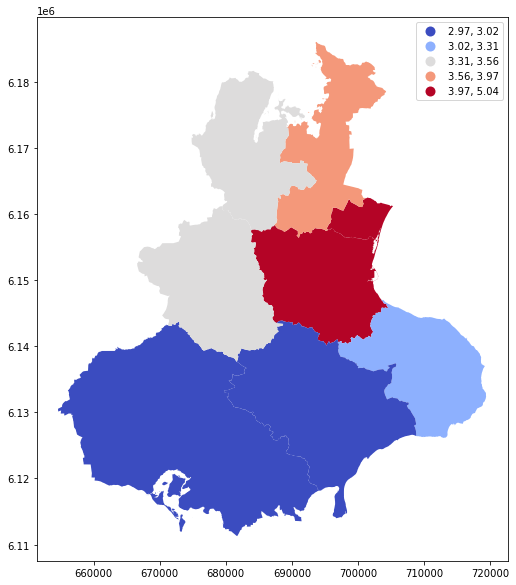

In [219]:
column_to_map = "Cumulative_incidens_per_100000"
cut = gdf.cx[minx-2500:maxx, miny:maxy]

f, ax = plt.subplots(figsize=[10,10])


cut.plot(column = column_to_map,
         scheme = "quantiles",
         legend=True,
         cmap = "coolwarm",
         ax=ax)


#minx, miny, maxx, maxy = gdf.total_bounds


offset = 10000
minx = minx-offset
maxx = maxx+offset
miny = miny
maxy = maxy+offset+500


# ax.set_xlim(minx, maxx)
# ax.set_ylim(miny, maxy)